In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
cat1 = cv2.imread('/Users/prajyottadas/CNN_data2/train/cats/1.jpg')
cat1 = cv2.cvtColor(cat1,cv2.COLOR_BGR2RGB)

In [3]:
type(cat1)

numpy.ndarray

In [4]:
cat1.shape

(281, 300, 3)

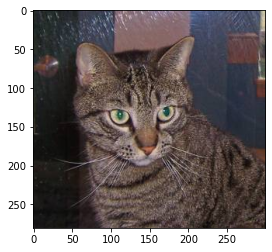

In [5]:
plt.imshow(cat1)

In [6]:
dog1 = cv2.imread('/Users/prajyottadas/CNN_data2/train/dogs/1.jpg')
dog1 = cv2.cvtColor(dog1,cv2.COLOR_BGR2RGB)

In [7]:
dog1.shape

(500, 327, 3)

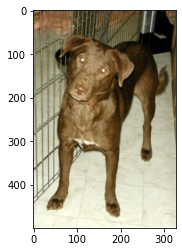

In [8]:
plt.imshow(dog1)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
img_gen = ImageDataGenerator(rotation_range=30, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1,
                               rescale=1/255, 
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True, 
                               fill_mode='nearest'
                              )

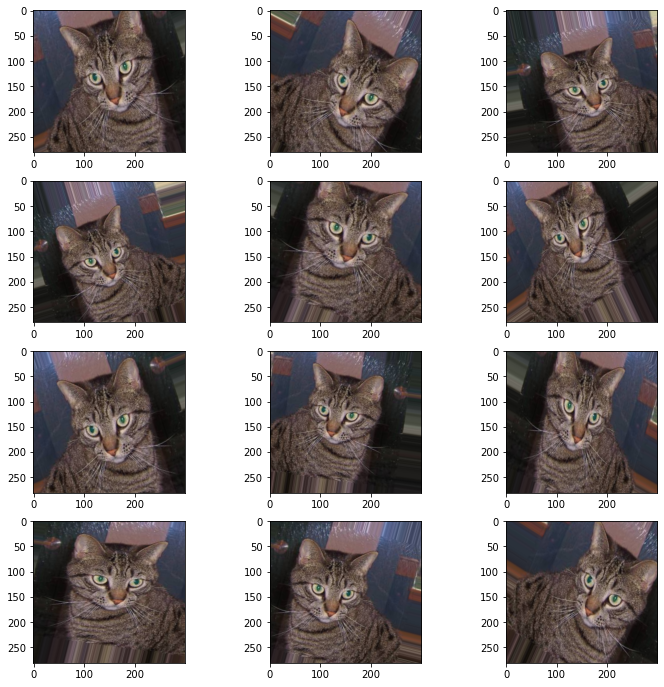

In [11]:
plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(4, 3, i+1)
    plt.imshow(img_gen.random_transform(cat1))
plt.show()

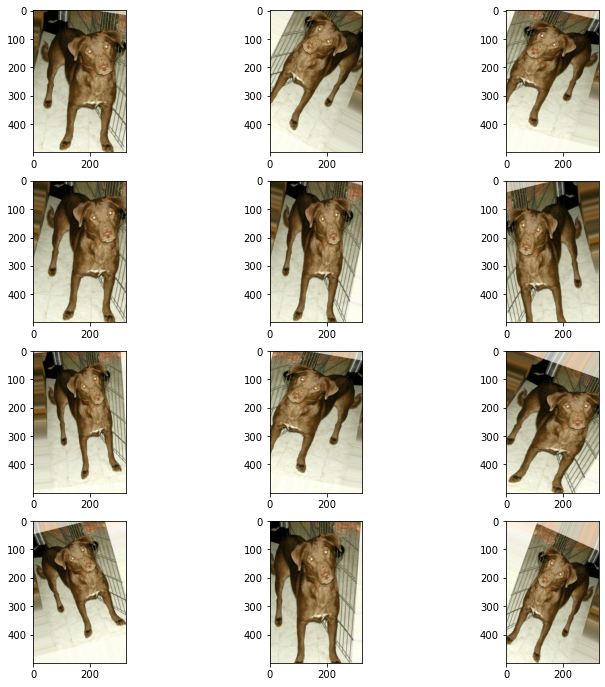

In [12]:
plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(4, 3, i+1)
    plt.imshow(img_gen.random_transform(dog1))
plt.show()

In [13]:
image_shape = (150,150,3)

In [14]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [15]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(5,5),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))


model.add(Flatten())


model.add(Dense(32))
model.add(Activation('relu'))


model.add(Dropout(0.4))


model.add(Dense(1))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 69, 69, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                2367520   
_________________________________________________________________
activation (Activation)      (None, 32)                0

In [17]:
train_image_gen = img_gen.flow_from_directory('/Users/prajyottadas/CNN_data2/train', target_size=image_shape[:2], batch_size=16, class_mode='binary')

Found 40 images belonging to 2 classes.


In [18]:
test_image_gen = img_gen.flow_from_directory('/Users/prajyottadas/CNN_data2/test', target_size=image_shape[:2], batch_size=16, class_mode='binary')

Found 20 images belonging to 2 classes.


In [19]:
train_image_gen.class_indices

{'cats': 0, 'dogs': 1}

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
results = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/100
150/150 [==============================] - 10s 7ms/step - loss: 2.6591 - accuracy: 0.4252 - val_loss: 1.0785 - val_accuracy: 0.5000


In [22]:
model.save('cat_dog2.h5')

In [23]:
results.history['accuracy']

[0.42500001192092896]

In [24]:
model.save('cat_dog_100epochs.h5')

In [25]:
from keras.models import load_model
model=load_model('cat_dog_100epochs.h5')

In [26]:
import numpy as np
from keras.preprocessing import image

dog_file = '/Users/prajyottadas/CNN_data2/train/dogs/17.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)   

dog_img = np.expand_dims(dog_img, axis=0)  
dog_img = dog_img/255

In [27]:
prediction_prob = model.predict(dog_img)

In [28]:
print(f'Probability that image is a dog is: {prediction_prob} ')

Probability that image is a dog is: [[0.8986573]] 
